# 1. Exploring Linear Trends

In [15]:
import warnings
warnings.filterwarnings('ignore')

## Reasons for Modeling: Interpolation

One common use of modeling is interpolation to determine a value "inside" or "in between" the measured data points. In this exercise, you will make a prediction for the value of the dependent variable distances for a given independent variable times that falls "in between" two measurements from a road trip, where the distances are those traveled for the given elapse times.

![](https://assets.datacamp.com/production/repositories/1480/datasets/54e50fcc0edd78c85780200e6225902e8dd39b2c/ch01_ex02_fig02.png)

In [1]:
times = (0., 1., 2., 3., 4., 5., 6.)
distances = (0., 44.04512153, 107.16353484, 148.43674052, 196.39705633, 254.4358147, 300.)

In [2]:
# Compute the total change in distance and change in time
total_distance = distances[-1] - distances[0]
total_time = times[-1] - times[0]

# Estimate the slope of the data from the ratio of the changes
average_speed = total_distance / total_time

# Predict the distance traveled for a time not measured
elapse_time = 2.5
distance_traveled = average_speed * elapse_time
print("The distance traveled is {}".format(distance_traveled))

The distance traveled is 125.0


## Reasons for Modeling: Extrapolation

Another common use of modeling extrapolation to estimate data values "outside" or "beyond" the range (min and max values of time) of the measured data. In this exercise, we have measured distances for times 0 through 5 hours, but we are interested in estimating how far we'd go in 8 hours. Using the same data set from the previous exercise, we have prepared a linear model distance = model(time). Use that model() to make a prediction about the distance traveled for a time much larger than the other times in the measurements.

![](https://assets.datacamp.com/production/repositories/1480/datasets/ba7464321089e724e40b06c36532c176e237145f/ch01_ex03_fig02.png)

In [6]:
def model(time):
    return time * average_speed

# Select a time not measured.
time = 8

# Use the model to compute a predicted distance for that time.
distance = model(time)

# Inspect the value of the predicted distance traveled.
print(distance)

# Determine if you will make it without refueling.
answer = (distance <= 400)
print(answer)

400.0
True


## Reasons for Modeling: Estimating Relationships

Another common application of modeling is to compare two data sets by building models for each, and then comparing the models. In this exercise, you are given data for a road trip two cars took together. The cars stopped for gas every 50 miles, but each car did not need to fill up the same amount, because the cars do not have the same fuel efficiency (MPG). Complete the function efficiency_model(miles, gallons) to estimate efficiency as average miles traveled per gallons of fuel consumed. Use the provided dictionaries car1 and car2, which both have keys car['miles'] and car['gallons'].



![](https://assets.datacamp.com/production/repositories/1480/datasets/79778532773c5cee6fa1c29caff5d66bd4f798c3/ch01_ex04_fig03.png)

In [13]:
car1 = {'gallons': np.array([0.,1.66666667,3.33333333,5.,6.66666667,8.33333333,10.,11.66666667,13.33333333,15.,16.66666667]),
        'miles': np.array([0.,50.,100.,150.,200.,250.,300.,350.,400.,450.,500.])}

car2 = {'gallons': np.array([0.,1.,2.,3.,4.,5.,6.,7.,8.,9.,10.]),
        'miles': np.array([0.,50.,100.,150.,200.,250.,300.,350.,400.,450.,500.])}

In [16]:
import numpy as np 

# Complete the function to model the efficiency.
def efficiency_model(miles, gallons):
   return np.mean( miles / gallons )

# Use the function to estimate the efficiency for each car.
car1['mpg'] = efficiency_model( car1['miles'] , car1['miles'] )
car2['mpg'] = efficiency_model( car2['miles'] , car2['miles'] )

# Finish the logic statement to compare the car efficiencies.
if car1['mpg'] > car2['mpg'] :
    print('car1 is the best')
elif car1['mpg'] < car2['mpg'] :
    print('car2 is the best')
else:
    print('the cars have the same efficiency')

the cars have the same efficiency


## Plotting the Data

Everything in python is an object, even modules. Your goal in this exercise is to review the use of the object oriented interfaces to the python library matplotlib in order to visualize measured data in a more flexible and extendable work flow. The general plotting work flow looks like this:



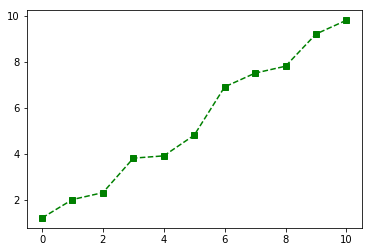

In [18]:
import matplotlib.pyplot as plt 
x = range(11)
y = [1.2,2,2.3,3.8,3.9,4.8,6.9,7.5,7.8,9.2,9.8]
fig, axis = plt.subplots()
axis.plot(x, y, color="green", linestyle="--", marker="s")
plt.show()

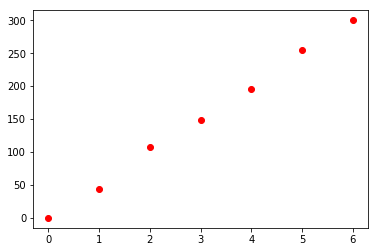

In [19]:
# Create figure and axis objects using subplots()
fig, axis = plt.subplots()

# Plot line using the axis.plot() method
line = axis.plot(times , distances , linestyle=" ", marker="o", color="red")

# Use the plt.show() method to display the figure
plt.show()

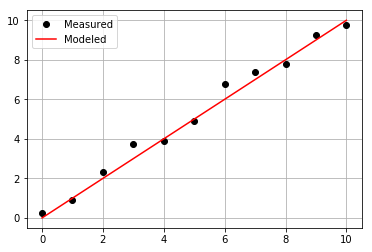

In [28]:
measured_distances = np.array([0.24835708,0.93086785,2.32384427,3.76151493,3.88292331,4.88293152,6.78960641,7.38371736,7.76526281,9.27128002,
9.76829115])
times = np.array([0.,1.,2.,3.,4.,5.,6.,7.,8.,9.,10.])

def model(tims, measured_distnaces):
    slope = np.ceil((measured_distances[-1] - measured_distances[0]) / (times[-1] - times[0]))
    return slope * times

# Pass times and measured distances into model
model_distances = model(times, measured_distances)

# Create figure and axis objects and call axis.plot() twice to plot data and model distances versus times
fig, axis = plt.subplots()
axis.plot(times, measured_distances, linestyle=" ", marker="o", color="black", label="Measured")
axis.plot(times, model_distances, linestyle="-", marker=None, color="red", label="Modeled")

# Add grid lines and a legend to your plot, and then show to display
axis.grid(True)
axis.legend(loc="best")
plt.show()

## Visually Estimating the Slope & Intercept

Building linear models is an automated way of doing something we can roughly do "manually" with data visualization and a lot of trial-and-error. The visual method is not the most efficient or precise method, but it does illustrate the concepts very well, so let's try it!

Given some measured data, your goal is to guess values for slope and intercept, pass them into the plot, and then adjust your input until the resulting model fits the data. Use the provided data xd, yd, and create model predictions with the provided function xm, ym = model(slope, intercept). Compare them using the provided plot_data_and_model(xd, yd, xm, ym).

![](https://assets.datacamp.com/production/repositories/1480/datasets/b10af870f99d87f8adad221ed091483ff57c4aae/ch01_ex08_fig01.png)

## Mean, Deviation, & Standard Deviation

The mean describes the center of the data. The standard deviation describes the spread of the data. But to compare two variables, it is convenient to normalize both. In this exercise, you are provided with two arrays of data, which are highly correlated, and you will compute and visualize the normalized deviations of each array.

![](https://assets.datacamp.com/production/repositories/1480/datasets/a3f411c02f22e364363813ddf15864f061b7774a/ch01_ex10_fig01.png)

In [33]:
x=np.array([ 3.20141089,  3.57332076,  4.2284669 ,  4.27233051,  4.49370529,
			 4.5713193 ,  4.74611933,  4.9143694 ,  5.06416613,  5.12046366,
			 5.1332596 ,  5.1382451 ,  5.19463348,  5.30012277,  5.32111385,
			 5.361098  ,  5.3622485 ,  5.42139975,  5.55601804,  5.56564872,
			 5.57108737,  5.60910021,  5.74438063,  5.82636432,  5.85993128,
			 5.90529103,  5.98816951,  6.00284592,  6.2829785 ,  6.28362732,
			 6.33858905,  6.3861864 ,  6.41291216,  6.57380586,  6.68822271,
			 6.73736858,  6.9071052 ,  6.92746243,  6.97873601,  6.99734545,
			 7.0040539 ,  7.17582904,  7.26593626,  7.49073203,  7.49138963,
			 7.65143654,  8.18678609,  8.20593008,  8.23814334,  8.39236527])

y=np.array([ 146.48264883,  167.75876162,  229.73232314,  205.23686657,
			 224.99693822,  239.79378267,  246.65838372,  264.14477475,
			 268.91257002,  267.25180588,  248.54953839,  265.25831322,
			 263.03153004,  251.08035094,  280.93733241,  276.53088378,
			 268.59007072,  268.62252076,  265.21874   ,  280.37743899,
			 283.47297931,  271.72788298,  299.42217399,  279.79758387,
			 270.70401032,  306.18168601,  295.17313188,  298.81898515,
			 305.35499931,  297.3187572 ,  330.10944498,  312.07619563,
			 338.08560914,  337.16702908,  331.10617501,  325.46645358,
			 337.66440893,  333.64162871,  370.85149057,  351.59390525,
			 362.27985309,  345.48425572,  365.1976818 ,  386.90415177,
			 371.05186831,  393.39852867,  397.95134137,  395.98005292,
			 415.89087335,  415.63691073])

In [88]:
def plot_cdfs(dx, dy, zx, zy):
    f, ax = plt.subplots(2,1,figsize=(12,8))
    x = range(50)
    ax[0].plot(x,dx, color="blue")
    ax[0].plot(x,dy, color="red")
    ax[0].set_ylabel("Deviations of X and Y")
    
    ax[1].plot(x,zx, color="blue")
    ax[1].plot(x,zy, color="red")
    ax[1].set_xlabel("Array Index")
    ax[1].set_ylabel("Normalized Deviations of X and Y")
    plt.show()

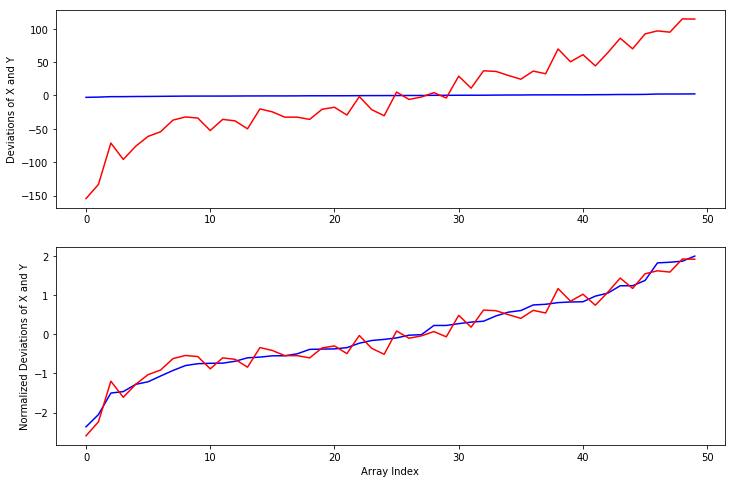

In [89]:
# Compute the deviations by subtracting the mean offset
dx = x - np.mean(x)
dy = y - np.mean(y)

# Normalize the data by dividing the deviations by the standard deviation
zx = dx / np.std(x)
zy = dy / np.std(y)

# Plot comparisons of the raw data and the normalized data
fig = plot_cdfs(dx, dy, zx, zy)

Covariance:  69.67981827138166
Correlation:  0.9824333697735637


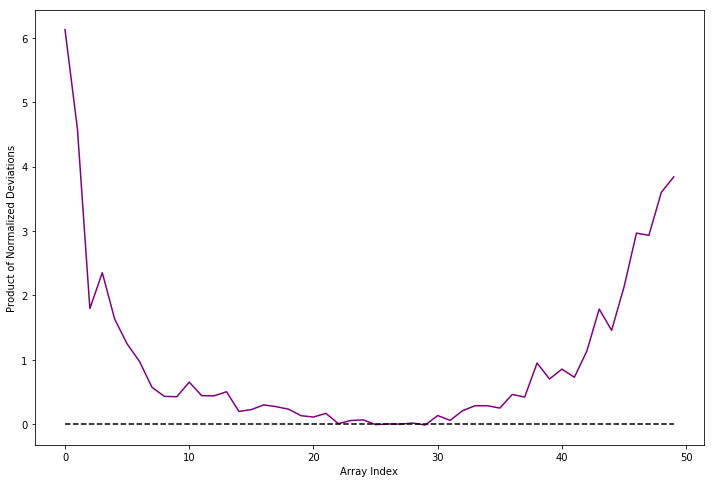

In [117]:
def plot_normalized_deviations(zx, zy):
    fig = plt.figure(figsize=(12,8))
    x = range(50)
    plt.plot(zx * zy, color="purple")
    plt.plot([num for num in range(50)], [0 for num in range(50)], linestyle="--", color='black')
    plt.ylabel("Product of Normalized Deviations")
    plt.xlabel("Array Index")
    return plt

# Compute the covariance from the deviations.
dx = x - np.mean(x)
dy = y - np.mean(y)
covariance = np.mean(dx * dy)
print("Covariance: ", covariance)

# Compute the correlation from the normalized deviations.
zx = dx / np.std(x)
zy = dy / np.std(y)
correlation = np.mean(zx * zy)
print("Correlation: ", correlation)

# Plot the normalized deviations for visual inspection. 
fig = plot_normalized_deviations(zx, zy)

## Correlation Strength

Intuitively, we can look at the plots provided and "see" whether the two variables seem to "vary together".

- Data Set A: x and y change together and appear to have a strong relationship.
- Data Set B: there is a rough upward trend; x and y appear only loosely related.
- Data Set C: looks like random scatter; x an y do not appear to change together and are unrelated.


![](https://assets.datacamp.com/production/repositories/1480/datasets/0b432ae4f447613dfef3143baa53fef637552cab/ch1_ex12_fig01.png)

![](https://assets.datacamp.com/production/repositories/1480/datasets/a826178cf3d5132dbd64ea346eaf1233d113102d/ch1_ex12_fig02.png)

![](https://assets.datacamp.com/production/repositories/1480/datasets/d07e0410be1912ba1bdbd3d091ea4f78f1a88cd9/ch1_ex12_fig03.png)

Recall that deviations differ from the mean, and we normalized by dividing the deviations by standard deviation. In this exercise you will compare the 3 data sets by computing correlation, and determining which data set has the most strongly correlated variables x and y. Use the provided data table data_sets, a dictionary of records, each having keys 'name', 'x', 'y', and 'correlation'.

In [120]:
data_sets = {'A': {'correlation': 0.99560586729446754,
  'x': np.array([ 2.55041235,  2.60839969,  2.79619981,  2.84385271,  3.15184751,
          3.21906477,  3.23462037,  3.33976744,  3.47394544,  3.56125803,
          3.67786134,  3.7339611 ,  3.86496991,  4.10019474,  4.24786673,
          4.24920164,  4.29714059,  4.31952159,  4.41315702,  4.41783781,
          4.42072788,  4.42420154,  4.62362038,  4.63538281,  4.70730828,
          4.7073288 ,  4.71777962,  4.82716962,  4.85543965,  4.98312847,
          5.08441026,  5.13865324,  5.21421035,  5.24607654,  5.26107949,
          5.30245284,  5.39280917,  5.42952286,  5.46962252,  5.62089269,
          5.67820005,  5.80961067,  5.92308322,  5.95929341,  6.02818114,
          6.32140278,  6.83206096,  6.90378732,  6.97401602,  7.31534773]),
  'y': np.array([  5.18184568,   5.12052882,   5.42316911,   5.84062449,
           6.5614449 ,   6.67094956,   6.25943637,   6.60223178,
           7.03070673,   7.36640234,   7.23592912,   7.42150745,
           7.45335607,   7.90133782,   8.69886493,   8.83746328,
           8.57627865,   8.88992641,   8.91672304,   8.67439568,
           8.93180467,   9.23291221,   9.23828425,   9.66192654,
           8.75968029,   9.62013323,   9.45732102,   9.57958741,
           9.73381949,   9.46936471,  10.11390254,  10.36658462,
          10.79789421,  10.36258554,  10.32003559,  10.47946642,
          11.01446886,  10.9412335 ,  10.80680499,  11.37010224,
          11.3806695 ,  11.86138259,  11.67065318,  11.83667129,
          11.95833524,  12.27692683,  13.73815199,  13.87283846,
          13.9493104 ,  14.57204868])},
 'B': {'correlation': 0.54118681396871149,
  'x': np.array([ 2.19664381,  2.406278  ,  2.47343147,  2.72871597,  3.06636806,
          3.51128038,  3.87855402,  4.09926408,  4.18003832,  4.20434562,
          4.29194259,  4.41336839,  4.50269971,  4.58240329,  4.59650649,
          4.60918513,  4.74669209,  4.77111432,  4.82900646,  4.84738553,
          5.00264796,  5.01962047,  5.02286149,  5.04517742,  5.09524948,
          5.15589119,  5.24177672,  5.26908573,  5.30974025,  5.36136493,
          5.42179707,  5.50681676,  5.58929395,  5.69179864,  5.84444261,
          5.94426748,  6.05209339,  6.07448552,  6.07964661,  6.10895368,
          6.19165516,  6.23993253,  6.30742282,  6.30947322,  6.32371148,
          6.43754466,  6.64768944,  6.65144774,  6.79088371,  7.98870064]),
  'y': np.array([  7.75732279,  -0.97068431,  -0.66103018,   5.05375913,
           3.93976632,   6.44408273,   9.17318937,   8.05647607,
          10.62302986,  14.59132646,   4.68693984,   8.54535728,
          10.23727485,   8.33081153,  13.32821592,  -0.38344428,
          17.61579867,   4.97170349,  10.50554646,  12.51365356,
           6.86355506,  11.88747988,  12.86263588,  12.18438671,
           6.48548172,  18.34315419,  11.39140361,   5.92753502,
          13.14739828,  10.8807806 ,  12.70116343,  -3.24043311,
          16.46301037,  11.99411949,  12.34700338,  10.16815219,
          15.17366173,  16.0886504 ,  13.24263662,  17.78585212,
          12.70267957,  10.88000673,   8.5034434 ,  10.28007359,
          15.91379868,  12.5473011 ,  11.91631483,  15.41604806,
           9.30581229,  13.92987605])},
 'C': {'correlation': 0.093390253000111709,
  'x': np.array([ 1.50176362,  1.96665095,  2.78558362,  2.84041313,  3.11713161,
          3.21414912,  3.43264917,  3.64296175,  3.83020766,  3.90057957,
          3.9165745 ,  3.92280638,  3.99329185,  4.12515346,  4.15139231,
          4.2013725 ,  4.20281062,  4.27674969,  4.44502255,  4.45706091,
          4.46385921,  4.51137526,  4.68047579,  4.7829554 ,  4.8249141 ,
          4.88161379,  4.98521188,  5.00355739,  5.35372312,  5.35453415,
          5.42323631,  5.482733  ,  5.5161402 ,  5.71725733,  5.86027839,
          5.92171072,  6.13388149,  6.15932804,  6.22342001,  6.24668181,
          6.25506737,  6.46978631,  6.58242032,  6.86341504,  6.86423703,
          7.06429567,  7.73348261,  7.7574126 ,  7.79767917,  7.99045658]),
  'y': np.array([-17.70183793, -12.68730947,  33.47056284,  -7.0881775 ,
           6.7091949 ,  23.53735376,  21.11660059,  35.3641024 ,
          31.59072152,  24.91144186,  -4.53019043,  20.56341545,
          13.01493562, -12.96994045,  30.97956936,  21.31852956,
           9.13346253,   4.82402639, -10.28277321,  12.10650699,
          16.42274434,  -4.27572923,  27.95621636,  -7.98933795,
         -24.3197774 ,  26.39886103,   3.51656715,   7.99064142,
          -2.69282132, -14.98633586,  30.93027062,  -0.05643774,
          37.60752021,  24.35144564,   6.68442643,  -5.53101698,
           0.5483712 ,  -7.08171402,  45.84065377,  15.1244233 ,
          30.91342343,  -7.33806017,  16.06140272,  32.57262109,
           8.36830187,  30.62642269,  -1.88612137,  -6.30071951,
          21.66576814,   9.91409021])}}

In [121]:
# Complete the function that will compute correlation.
def correlation(x,y):
    x_dev = x - np.mean(x)
    y_dev = y - np.mean(y)
    x_norm = x_dev / np.std(x)
    y_norm = y_dev / np.std(y)
    return np.mean(x_norm * y_norm)

# Compute and store the correlation for each data set in the list.
for name, data in data_sets.items():
    data['correlation'] = correlation(data['x'], data['y'])
    print('data set {} has correlation {:.2f}'.format(name, data['correlation']))

# Assign the data set with the best correlation.
best_data = data_sets['A']

data set A has correlation 1.00
data set B has correlation 0.54
data set C has correlation 0.09
